In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass  # Mass of the body [kg]
        self.position = np.array(position)  # Position of the body [m]
        self.velocity = np.array(velocity)  # Velocity of the body [m/s]
        self.force = np.array([0, 0])  # Force acting on the body [N]

    def update(self, vel, pos):
        # Update the velocity and position
        self.velocity = vel
        self.position = pos

    def reset_force(self):
        self.force = np.array([0, 0])

# Initialize bodies with random masses, positions, and velocities
def initialize_bodies(num_bodies, mass_range, position_range, velocity_range):
    masses = np.random.uniform(mass_range[0], mass_range[1], num_bodies)
    positions = np.random.uniform(position_range[0], position_range[1], (num_bodies, 2))
    velocities = np.random.uniform(velocity_range[0], velocity_range[1], (num_bodies, 2))
    return [Body(masses[i], positions[i], velocities[i]) for i in range(num_bodies)]

In [31]:
# initialize bodies with random masses, positions, and velocities over set range
# bodies[n] = Body(mass, position [x, y], velocity [vx, vy])

bodies = initialize_bodies(25, mass_range = [1, 25], position_range = [-100, 100], velocity_range = [-50, 50])

In [25]:
G = 1 # gravitational constant
soft = 0.05 # softening parameter

def rk4_main(bodies, dt): # calculates new positions and velocities for all bodies

    new_rs = []
    new_vs = []
    
    for i, body_i in enumerate(bodies):
        new_rs.append(body_i.position + (((dt**2)/12)*rk4_step(body_i, i, dt)))
        new_vs.append(body_i.position + ((dt/6)*rk4_step(body_i, i, dt)))

    return [new_rs, new_vs]

def rk4_step(body, i, dt): # computes each slope k
    
        ks = k_calc(body, i, bodies, dt)
    
        return (ks[0] + 2*ks[1] + 2*ks[2] + ks[3])

def accel(r_i, idx, bodies): # computes acceleration of ith body
    r_ij = np.array([0, 0]) # points from ith to jth body
    a_i = [0, 0]
    i = idx
    
    for j, body_j in enumerate(bodies):
        r_j = body_j.position
        m_j = body_j.mass
        
        for x in range(2): # acceleration of ith body due to jth body
            r_ij[x] = r_i[x] - r_j[x]
            
            a_ix = -(((G*m_j)/((norm(r_ij)+ soft)**3))*r_ij[x])*opp_kd(i,j)
            a_i[x] = a_i[x] + a_ix
    
    return np.array(a_i)

def k_calc(body, idx, bodies, interval): # calculates the ks
    i = idx
    dt = interval

    k1 = np.array(accel(body.position, i, bodies)) # accel at time t and component y(t)
    k2 = np.array(accel(body.position + 0.5*k1*((dt/2)**2), i, bodies)) # accel at time t+dt/2 and component v + (dt/2)*k1
    k3 = np.array(accel(body.position + 0.5*k2*((dt/2)**2), i, bodies)) # accel at time t+dt/2 and component v + (dt/2)*k2
    k4 = np.array(accel(body.position + 0.5*k2*(dt**2), i, bodies)) # accel at time t+dt and component v + dt*k3

    ks = [k1, k2, k3, k4]
    
    return ks

def norm(v):
    return np.sqrt(v[0]**2+v[1]**2)

def opp_kd(i, j):
    if i == j:
        return 0
    else :
        return 1


In [ ]:
# test
for body in bodies:
    print("position = " + str(body.position) + ", velocity = " + str(body.velocity))

new_set = rk4_main(bodies, 10)
print("")
for i, body in enumerate(bodies):
    body.position = new_set[0][i]
    body.velocity = new_set[1][i]
    print("position = " + str(body.position) + ", velocity = " + str(body.velocity))

new_set_2 = rk4_main(bodies, 10)
print("")
for i, body in enumerate(bodies):
    body.position = new_set_2[0][i]
    body.velocity = new_set_2[1][i]
    print("position = " + str(body.position) + ", velocity = " + str(body.velocity))

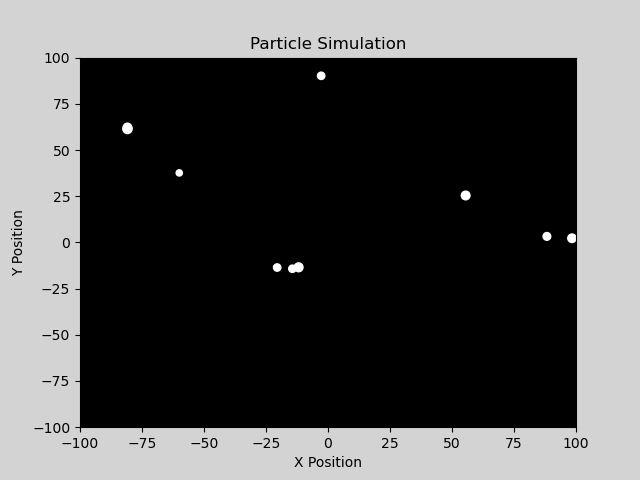

In [36]:
# Example animation using matplotlib
%matplotlib widget

# Time step for position updates (use a larger dt to see noticeable movement)
dt = 3

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim(-100, 100) # X-axis limits
ax.set_ylim(-100, 100) # Y-axis limits
ax.set_title("Particle Simulation", color="black")  # Title
ax.set_xlabel("X Position", color="black")  # X-axis label
ax.set_ylabel("Y Position", color="black")  # Y-axis label
ax.tick_params(axis='x', colors="black")  # X-axis ticks
ax.tick_params(axis='y', colors="black")  # Y-axis ticks
ax.set_facecolor("Black")  # Set background color
fig.patch.set_facecolor("lightgray")  # Outside the plot

# Create scatter plot with initial positions
scat = ax.scatter(
    [body.position[0] for body in bodies], # Initial x-coordinate of bodies
    [body.position[1] for body in bodies], # Initial y-coordinate of bodies
    s = [body.mass * 2 for body in bodies], # Size of bodies proportional to mass
    c = "white",  # Color of bodies
)

# Function to update the simulation for each frame
def update_position(frame):

    updated = rk4_main(bodies, dt) # Initialize as a list
    
    for i, body in enumerate(bodies):
        body.update(updated[1][i], updated[0][i])

    scat.set_offsets(updated[0])  # Update scatter plot

    return scat

# Create the animation
ani = animation.FuncAnimation(
    fig = fig,
    func = update_position,
    frames = range(1000),  # Number of frames
    interval = 0.005,  # Time between frames in milliseconds
    repeat = False,  # Stop after the last frame
)

# Show the plot
plt.show()